In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras


In [3]:
def plot_series(time, series, format='-', start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return time*slope

def seasonal_pattern(season_time):
    return np.where(season_time<0.1,
                    np.cos(season_time*7*np.pi),
                    1/np.exp(5*season_time))

def seasonality(time, period, amplitude=1, phase=0):
    season_time = ((time+phase)%period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level
time = np.arange(4*365+1, dtype='float32')
baseline = 10
amplitude = 40
slope = 0.01
noise_level = 2

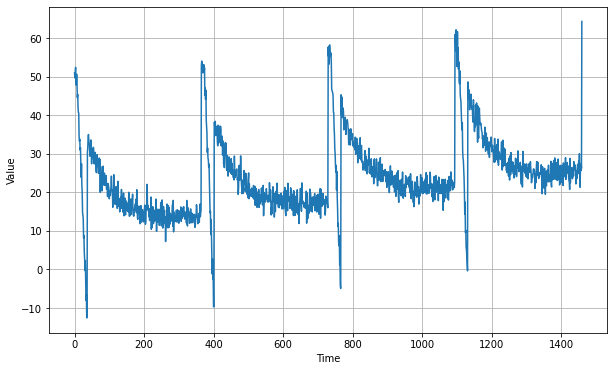

In [4]:
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
series += noise(time, noise_level, seed=42)

plt.figure(figsize=(10,6))
plot_series(time, series)
plt.show()



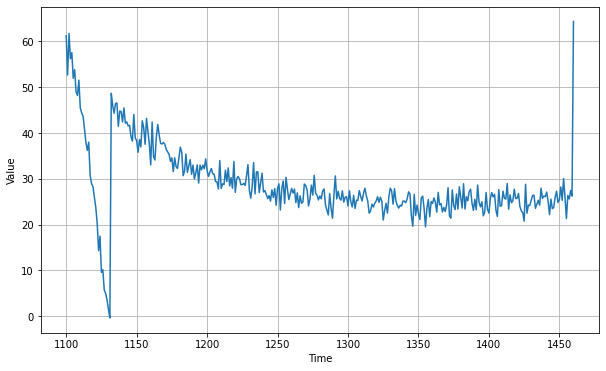

In [5]:
split_time = 1100
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]
plt.figure(figsize=(10,6))
plot_series(time_valid, x_valid)
plt.show()

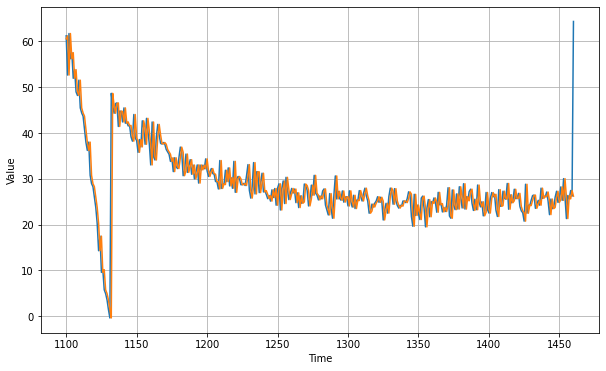

In [6]:
naive_forecast = series[split_time-1:-1]
plt.figure(figsize=(10,6))
plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast)

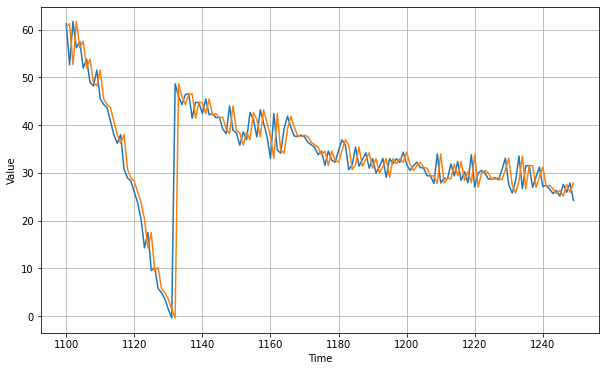

In [7]:
plt.figure(figsize=(10,6))
plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, naive_forecast, start=0, end=150)

In [9]:
print(tf.keras.metrics.mean_squared_error(naive_forecast, x_valid).numpy())
print(tf.keras.metrics.mean_absolute_error(naive_forecast, x_valid).numpy())

19.578304
2.6011972


In [12]:
def moving_average_forecast(series, window_size):
    maf = []
    for i in range(window_size,len(series)):
        win = series[i-window_size:i]
        maf.append(sum(win)/window_size)
    return np.array(maf)

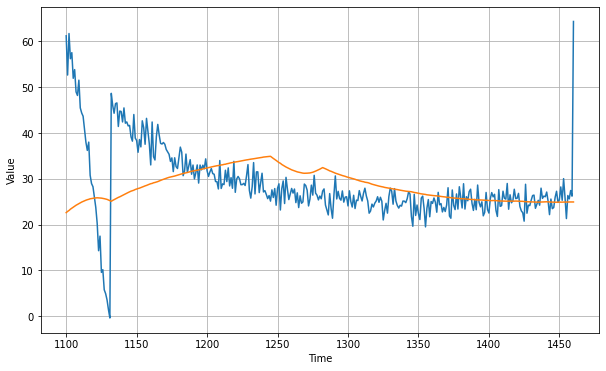

In [20]:
moving_avg = moving_average_forecast(series, 150)[split_time - 150:]

plt.figure(figsize=(10,6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)

In [21]:
print(tf.keras.metrics.mean_squared_error(x_valid, moving_avg).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy())

78.96733830576618
5.794588580940569


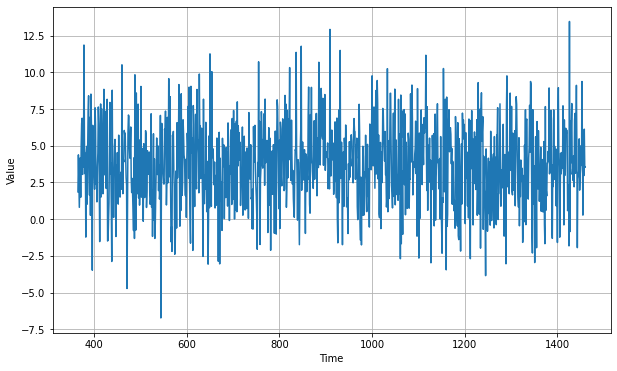

In [22]:
diff_series = (series[365:] - series[:-365])
diff_time = time[365:]

plt.figure(figsize=(10,6))
plot_series(diff_time, diff_series)
plt.show()

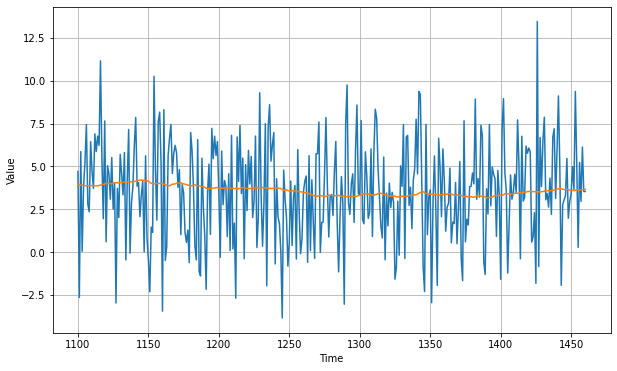

In [25]:
diff_moving_avg = moving_average_forecast(diff_series, 150)[split_time-365-150:]

plt.figure(figsize=(10,6))
plot_series(time_valid, diff_series[split_time-365:])
plot_series(time_valid, diff_moving_avg)

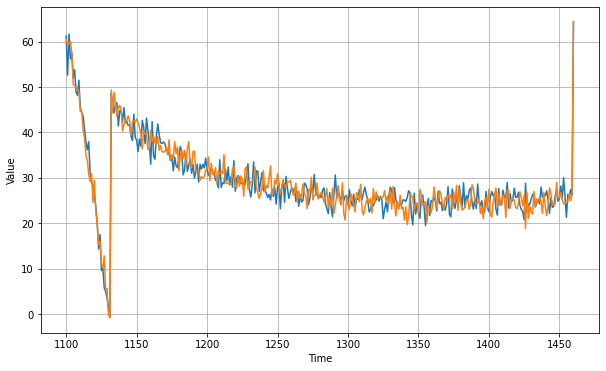

In [26]:
diff_moving_avg_plus_past = series[split_time - 365:-365] + diff_moving_avg # YOUR CODE HERE

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)# YOUR CODE HERE)
plot_series(time_valid, diff_moving_avg_plus_past)# YOUR CODE HERE)
plt.show()

# Expected output: Chart from 1100->1450+ on X. Same chart as earlier for time series, but projection overlaid looks close in value to it

In [27]:
print(keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_past).numpy())# YOUR CODE HERE)
print(keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_past).numpy())# YOUR CODE HERE)

# EXPECTED OUTPUT
# 8.498155
# 2.327179

8.422541435880815
2.305071968029521


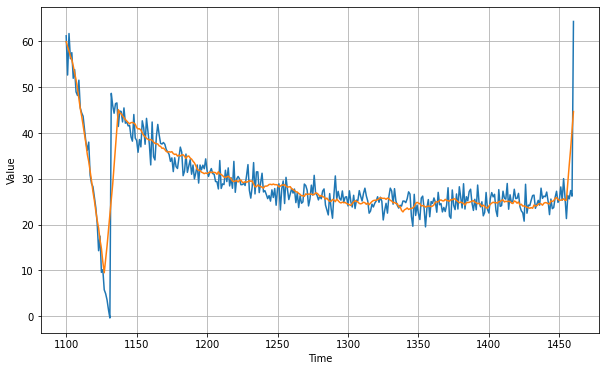

In [28]:
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - 370:-360], 10) + diff_moving_avg # YOUR CODE HERE

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)# YOUR CODE HERE)
plot_series(time_valid, diff_moving_avg_plus_smooth_past)# YOUR CODE HERE)
plt.show()

# EXPECTED OUTPUT:
# Similar chart to above, but the overlaid projections are much smoother

In [29]:
print(keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())# EXPECTED OUTPUT:
# Similar chart to above, but the overlaid projections are much smoother
print(keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())# EXPECTED OUTPUT:
# Similar chart to above, but the overlaid projections are much smoother

# EXPECTED OUTPUT
# 12.527958
# 2.2034433


12.448306318297414
2.195844032307631
